<a href="https://colab.research.google.com/github/hhzwann/Data-Science-Dicoding/blob/main/Hazwan_analisis_data_project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek analisis data

## Latihan Data Wrangling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gathering Data

Seperti yang telah kita bahas sebelumnya, pada proyek latihan ini data yang akan kita gunakan terdiri dari 4 tabel. Oleh karena itu, pada tahap ini kita akan memuat (load) keempat tabel tersebut.

#### Memuat tabel customers
Data pertama yang harus kita muat ialah data dari tabel customers. Berikut merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

In [ ]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia



#### Load tabel orders
Data selanjutnya yang harus kita muat ialah data dari tabel orders. Hal ini dapat dilakukan dengan menjalankan kode berikut.

In [ ]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


#### Memuat tabel product
Tabel berikutnya yang harus kita muat ialah tabel product. Berikut merupakan kode yang dapat digunakan untuk membuat tabel product menjadi sebuah DataFrame bernama product_df.

In [ ]:
product_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv")
product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


#### Load tabel sales
Last but not least, tabel terakhir yang harus kita muat ialah tabel sales. Berikut merupakan contoh kode untuk melakukannya.

In [ ]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


Oke, sekarang kita telah berhasil memuat semua data yang dibutuhkan. Tahap selanjutnya ialah menilai kualitas dari data tersebut.

### Assessing Data
#### Menilai Data customers_df
Data pertama yang akan kita nilai adalah customers_df. Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam customers_df. Proses ini dapat dilakukan menggunakan method info() seperti contoh kode berikut.

In [ ]:
# menilai data customer df
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [ ]:
# cek jumlah missing value dalam customer df
customer_misssing_value = customers_df.isna().sum()
print ("missing value di kolom gender ada sebanyak:")
print (customer_misssing_value)

missing value di kolom gender ada sebanyak:
customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64


Jika Anda perhatikan, tidak ada masalah dengan tipe data dari seluruh kolom tersebut. Akan tetapi, terdapat sedikit perbedaan pada jumlah data pada kolom gender. Hal ini menunjukkan adanya missing values pada kolom gender. Nah, untuk memastikan hal ini, jalankan kode berikut.

In [ ]:
customers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

Nah, gambar di atas menunjukkan bahwa terdapat 18 missing values pada kolom gender. Hal ini akan kita tangani pada tahap data cleaning nanti.

Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.

In [ ]:
# cek duplikasi data
print("Jumlah duplikasi di customer_df: ", customers_df.duplicated().sum())

Jumlah duplikasi di customer_df:  6


Ketika menjalankan kode di atas, Anda akan menemukan bahwa terdapat 6 data yang terduplikat. Pada tahap data cleaning nanti, kita akan menghilangkan semua duplikasi tersebut.

Sekarang kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame. Berikut merupakan contoh penggunaannya.

In [ ]:
# Sekarang kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df. method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.)
customer_statistik = customers_df.describe()
print (customer_statistik)

       customer_id          age     zip_code
count  1007.000000  1007.000000  1007.000000
mean    501.726912    50.929494  5012.538232
std     288.673238    30.516299  2885.836112
min       1.000000    20.000000     2.000000
25%     252.500000    34.000000  2403.500000
50%     502.000000    50.000000  5087.000000
75%     751.500000    65.000000  7493.500000
max    1000.000000   700.000000  9998.000000


Jika diperhatikan, terdapat keanehan pada nilai maksimum yang terdapat pada kolom age. Ini kemungkinan besar terjadi karena adanya inaccurate value pada kolom tersebut. Masalah ini juga akan kita bersihkan dalam tahap cleaning data.

#### Menilai Data orders_df
Oke, selanjutnya kita akan menilai data pada orders_df. Seperti biasa, kita akan mulai dengan memeriksa tipe data dari tiap kolom menggunakan method info().

In [ ]:
# menilai data orders df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


Jika Anda perhatikan, jumlah data pada orders_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom order_date & delivery_date. Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

Berikutnya, kita perlu memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada orders_df. Proses ini dilakukan dengan menjalankan kode berikut.

In [ ]:
# Berikutnya, kita perlu memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada orders_df
print("Jumlah duplikasi di orders_df: ",orders_df.duplicated().sum())

# cek statistik tabel orders df
orders_statistik = orders_df.describe()
print (orders_statistik)

Jumlah duplikasi di orders_df:  0
          order_id  customer_id       payment
count  1000.000000  1000.000000   1000.000000
mean    500.500000   506.640000  33972.936000
std     288.819436   277.115502  14451.609047
min       1.000000     1.000000  10043.000000
25%     250.750000   275.250000  21329.250000
50%     500.500000   515.000000  33697.500000
75%     750.250000   737.250000  46249.000000
max    1000.000000  1000.000000  59910.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada orders_df.

#### Menilai Data product_df
Selanjutnya, kita akan menilai data pada product_df. Pertama, gunakan method info() untuk memastikan tipe data tiap kolom dalam product_df telah sesuai.

In [ ]:
# menilai data product df
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa tidak terdapat masalah pada tipe data tiap kolom dalam product_df.  Selain itu, jumlah datanya juga telah lengkap sehingga tidak ada missing value di dalamnya.

Hal berikutnya yang harus diperiksa ialah duplikasi dan ringkasan parameter statistik dari product_df. Berikut merupakan kode untuk melakukannya.

In [ ]:
# berikutnya yang harus diperiksa ialah duplikasi
print("Jumlah duplikasi di product_df: ", product_df.duplicated().sum())

# ringkasan parameter statistik dari product_df.
product_statistik = product_df.describe()
print (product_statistik)

Jumlah duplikasi di product_df:  6
        product_id        price     quantity
count  1266.000000  1266.000000  1266.000000
mean    627.926540   105.812006    60.138231
std     363.971586     9.715611    11.682791
min       0.000000    90.000000    40.000000
25%     313.250000    95.250000    50.000000
50%     626.500000   109.000000    60.000000
75%     942.750000   114.000000    70.000000
max    1259.000000   119.000000    80.000000


Berdasarkan gambar di atas, dapat dilihat bahwa terdapat 6 data yang terduplikasi pada product_df. Pada tahap cleaning data, kita akan menghapus duplikasi tersebut.

#### Menilai Data sales_df
Data terakhir yang harus kita nilai ialah sales_df. Sebagai permulaan, gunakan method info() untuk memeriksa tipe data dan jumlah data yang ada di dalam sales_df.

In [ ]:
# menilai data sales df
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


Berdasarkan hasil di atas, tidak ada masalah pada tipe data tiap kolom dalam sales_df. Namun, terdapat keanehan pada jumlah data pada kolom total_price. Hal ini menunjukkan adanya missing value pada kolom tersebut. Untuk memastikannya, kita bisa menjalankan kode berikut.

In [ ]:
# cek jumlah missing value dalam customer df
sales_misssing_value = sales_df.isna().sum()
print ("missing value di sales_df:")
print (sales_misssing_value)

missing value di sales_df:
sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64


Berdasarkan hasil di atas, dapat disimpulkan bahwa terdapat 19 missing value pada kolom total_price. Hal ini akan kita bersihkan pada tahap cleaning data.

Tahap selanjutnya ialah memeriksa duplikasi dan ringkasan parameter statistik dari sales_df. Berikut merupakan contoh kode untuk melakukannya.

In [ ]:
# cek duplikasi di sales df
print("Jumlah duplikasi: ", sales_df.duplicated().sum())

# cek statistik sales df
sales_statistik = sales_df.describe()
print (sales_statistik)

Jumlah duplikasi:  0
          sales_id     order_id   product_id  price_per_unit    quantity  \
count  5000.000000  5000.000000  5000.000000     5000.000000  5000.00000   
mean   2499.500000   503.038200   634.053200      103.501600     1.99240   
std    1443.520003   285.964418   363.255794        9.195004     0.80751   
min       0.000000     1.000000     1.000000       90.000000     1.00000   
25%    1249.750000   258.000000   323.000000       95.000000     1.00000   
50%    2499.500000   504.500000   635.000000      102.000000     2.00000   
75%    3749.250000   749.000000   951.000000      112.000000     3.00000   
max    4999.000000   999.000000  1259.000000      119.000000     3.00000   

       total_price  
count  4981.000000  
mean    206.307368  
std      86.352449  
min      90.000000  
25%     112.000000  
50%     204.000000  
75%     285.000000  
max     357.000000  


Hasil di atas menunjukkan bahwa tidak ada duplikasi pada sales_df. Selain itu, ia juga menunjukkan tidak terdapat keanehan dalam ringkasan parameter statistik dari sales_df.

Oke, sampai tahap ini, kita telah berhasil mengidentifikasi berbagai masalah pada data yang telah kita kumpulkan.

### Cleaning Data
Nah, sekarang kita akan memasuki proses terakhir dalam data wrangling yaitu pembersihan atau cleaning data. Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

#### Membersihkan Data customers_df
Berdasarkan hasil proses assessing data, diketahui bahwa terdapat tiga masalah yang dijumpai dalam customer_df, yaitu duplicate data, missing value, dan inaccurate value.

##### Menghilangkan duplicate data

Masalah pertama yang akan kita tangani ialah duplicate data. Seperti yang telah kita pelajari sebelumnya, ketika menemukan duplikasi pada data, kita harus menghilangkan atau menghapus duplikasi tersebut. Nah, untuk melakukan hal ini, kita dapat memanfaatkan method drop_duplicates(). Berikut merupakan kode untuk menghapus duplikasi pada customer_df.

In [ ]:
# menanggani duplicate data
duplikat = customers_df.drop_duplicates(inplace=True)

Setelah menjalankan kode di atas, periksa kembali apakah masih terdapat duplikasi pada data tersebut dengan menjalankan kode berikut.

In [ ]:
# setelah itu cek lagi duplicate data di customer df nya, pastikan hasilnya 0
print ("jumlah duplicate data di customer_df =", customers_df.duplicated().sum())

jumlah duplicate data di customer_df = 0


Jika proses penghapusan duplikasi berjalan lancar, kode di atas akan menghasilkan keluaran yang menunjukkan tidak adanya duplikasi pada customers_df.

##### Menangani missing value
Masalah berikutnya yang harus kita tangani ialah missing value pada kolom gender. Nah, secara umum terdapat tiga metode untuk mengatasi missing value yaitu dropping, imputation, dan interpolation. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut

Kode di bawah hanya akan menampilkan baris data yang memenuhi kondisi customers_df.gender.isna() atau dengan kata lain ia akan menampilkan baris data yang mengandung missing value pada kolom gender. Berikut merupakan tampilan baris data tersebut..

In [ ]:
missing_value_customer = customers_df[customers_df.gender.isna()]
print ("baris data yang memenuhi kondisi customers_df.gender.isna() :")
print (missing_value_customer)

baris data yang memenuhi kondisi customers_df.gender.isna() :
     customer_id customer_name gender  age                     home_address  \
38            39      fulan 39    NaN   80  7440 Cameron Estate DrSuite 628   
167          168     fulan 168    NaN   27         2781 Berge MallSuite 452   
322          322     fulan 322    NaN   30        593 Becker CircleApt. 333   
393          393     fulan 393    NaN   34          5158 Levi HillSuite 531   
442          442     fulan 442    NaN   26           5157 Feil RoadApt. 633   
722          720     fulan 720    NaN   40         31 Jordan ParadeApt. 400   
745          743     fulan 743    NaN   57   09 Christopher StreetSuite 967   
773          771     fulan 771    NaN   74     7367 Wright JunctionApt. 773   
798          795     fulan 795    NaN   49          487 Summer MewsApt. 874   
801          798     fulan 798    NaN   56           27 Aiden KnollApt. 875   
825          822     fulan 822    NaN   59        41 Jenkins KnollSui

Berdasarkan hasil di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Musabab kolom gender merupakan kolom kategorik, kita akan menggunakan nilai yang dominan sebagai pengganti missing value tersebut. Gunakanlah method value_counts()untuk mengidentifikasi nilai yang dominan.

In [ ]:
# jadi pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.
customer_imputation = customers_df.gender.value_counts()
print ("nilai yang paling dominan dalam kolom gender ialah :")
print (customer_imputation)

nilai yang paling dominan dalam kolom gender ialah :
Prefer not to say    725
Male                 143
Female               115
Name: gender, dtype: int64


Berdasarkan hasil di atas, dapat diketahui bahwa nilai yang paling dominan dalam kolom gender ialah “Prefer not to say”. Nilai inilah yang selanjutnya akan kita gunakan sebagai pengganti missing value. Proses penggantian ini dapat dilakukan menggunakan method fillna()seperti contoh berikut.

In [ ]:
customers_df.fillna(value="Prefer not to say", inplace=True)

Untuk memastikan proses di atas berjalan dengan semestinya, kita bisa menjalankan kembali kode untuk mengidentifikasi missing value seperti berikut.

In [ ]:
missing_value_customer_2 = customers_df.isna().sum()
print ("missing value :")
print (missing_value_customer_2)

missing value :
customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64


Jika proses pembersihan missing value tersebut berhasil, Anda akan memperoleh hasil seperti diatas.

##### Menangani inaccurate value
Oke, sekarang kita akan mengatasi masalah inaccurate value pada kolom age. Sebagai awal, kita perlu melihat data baris data yang mengandung inaccurate value tersebut (baris dengan nilai age maksimum). Hal ini dilakukan menggunakan teknik filter seperti contoh kode berikut.

In [ ]:
data_inaccurate_value = customers_df[customers_df.age == customers_df.age.max()]
print (data_inaccurate_value)

     customer_id customer_name             gender  age  \
967          961     fulan 961  Prefer not to say  700   

                   home_address  zip_code        city            state  \
967  29 Farrell ParadeSuite 818      6528  New Joseph  South Australia   

       country  
967  Australia  


In [ ]:
# Berdasarkan data tersebut, kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error sehingga kelebihan memasukkan nilai nol. Oleh karena itu, gantilah dengan nilai 70. Proses ini dilakukan dengan memanfaatkan method replace()seperti contoh berikut.
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

# Nah, untuk memastikan kode diatas berjalan sesuai harapan, jalankanlah kembali kode berikut.
data_inaccurate_value_2 = customers_df[customers_df.age == customers_df.age.max()]

print (data_inaccurate_value_2)

     customer_id customer_name             gender  age  \
215          216     fulan 216  Prefer not to say  500   

               home_address  zip_code       city               state  \
215  038 Haley MewsApt. 810      3991  Bayertown  Northern Territory   

       country  
215  Australia  


ternyata masih ada invalid value lain yang terdapat dalam kolom age.

In [ ]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

# Nah, untuk memastikan kode diatas berjalan sesuai harapan, jalankanlah kembali kode berikut.
data_inaccurate_value_3 = customers_df[customers_df.age == customers_df.age.max()]
print (data_inaccurate_value_3)

     customer_id customer_name             gender  age  \
34            35      fulan 35               Male   80   
38            39      fulan 39  Prefer not to say   80   
142          143     fulan 143  Prefer not to say   80   
154          155     fulan 155               Male   80   
170          171     fulan 171  Prefer not to say   80   
174          175     fulan 175  Prefer not to say   80   
181          182     fulan 182               Male   80   
235          236     fulan 236  Prefer not to say   80   
424          424     fulan 424  Prefer not to say   80   
438          438     fulan 438  Prefer not to say   80   
495          495     fulan 495               Male   80   
524          524     fulan 524  Prefer not to say   80   
598          597     fulan 597  Prefer not to say   80   
703          702     fulan 702  Prefer not to say   80   
734          732     fulan 732  Prefer not to say   80   

                          home_address  zip_code                   city

In [ ]:
# Untuk memastikan kembali tidak terdapat inaccurate value pada customers_df, jalankanlah kode berikut.
statistik_customer = customers_df.describe()
print (statistik_customer)

       customer_id          age     zip_code
count  1001.000000  1001.000000  1001.000000
mean    500.942058    49.874126  5000.693307
std     289.013599    17.644663  2886.084454
min       1.000000    20.000000     2.000000
25%     251.000000    34.000000  2398.000000
50%     501.000000    50.000000  5079.000000
75%     751.000000    65.000000  7454.000000
max    1000.000000    80.000000  9998.000000


Berdasarkan hasil tersebut dapat dilihat bahwa kolom age memiliki nilai maksimum yang cukup masuk akal.

#### Membersihkan Data orders_df
Oke, sekarang kita telah menyelesaikan semua permasalahan yang ada pada customers_df. Selanjutnya, kita akan mengatasi permasalahan pada orders_df. Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom order_date & delivery_date.

Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom order_date & delivery_date menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas. Berikut merupakan contoh kode untuk melakukannya.

In [ ]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

# Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info()
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


#### Membersihkan Data product_df
Data berikutnya yang akan kita bersihkan ialah product_df. Sesuai hasil assessing data sebelumnya, kita mengetahui bahwa terdapat 6 data yang terduplikasi pada product_df. Untuk mengatasi hal ini, kita perlu membuang data yang sama tersebut menggunakan method drop_duplicates() seperti contoh berikut.

In [ ]:
product_df.drop_duplicates(inplace=True)

# Kode di atas akan menghapus semua data yang duplikat. Untuk memastikan kode tersebut berjalan sesuai harapan, jalankanlah kode berikut.
print("Jumlah duplikasi data di product_df : ", product_df.duplicated().sum())

Jumlah duplikasi data di product_df :  0


#### Membersihkan Data sales_df
Data selanjutnya yang perlu Anda bersihkan ialah sales_df. Berdasarkan hasil penilain data sebelumnya, diketahui bahwa terdapat 19 missing value pada kolom total_price. Untuk mengetahui proses penanganan missing value yang paling sesuai, kita perlu melihat terlebih dahulu baris data yang mengandung missing value tersebut.

In [ ]:
missing_value_sales = sales_df[sales_df.total_price.isna()]
print ("menampilkan semua baris data yang memiliki missing value pada kolom total_price seperti pada gambar berikut :")
print (missing_value_sales)

menampilkan semua baris data yang memiliki missing value pada kolom total_price seperti pada gambar berikut :
      sales_id  order_id  product_id  price_per_unit  quantity  total_price
9            9         2        1196             105         1          NaN
121        121        27        1027              90         3          NaN
278        278        63         360              94         2          NaN
421        421        95        1091             115         1          NaN
489        489       108        1193             105         3          NaN
539        539       117         405             119         2          NaN
636        636       134         653              93         3          NaN
687        687       145        1138             102         1          NaN
854        854       177          64             104         1          NaN
1079      1079       222         908              94         3          NaN
1193      1193       248        1121             102  

Berdasarkan tampilan data tersebut, kita menemukan bahwa nilai total_price merupakan hasil perkalian antara price_per_unit dan quantity. Kita dapat menggunakan pola ini untuk menangani missing value pada kolom total_price. Berikut merupakan contoh penerapan kode untuk melakukannya.

In [ ]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

Kode di atas akan mengatasi seluruh missing value serta memastikan nilai pada kolom total_price telah sesuai. Untuk memastikan hal ini, Anda dapat memeriksa kembali jumlah missing value pada sales_df menggunakan kode berikut.

In [ ]:
missing_value_sales_2 = sales_df.isna().sum()
print ("missing value di sales_df :")
print (missing_value_sales_2)

missing value di sales_df :
sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64


## Latihan Exploratory Data Analysis

Latihan ini merupakan lanjutan dari materi Latihan Data Wrangling. Oleh karena itu, sebelum melanjutkan materi ini pastikan Anda telah menyelesaikan latihan tersebut.

### Tujuan:
Pertama, kita akan melanjutkan proyek analisis data Dicoding Collection dengan menjalankan proses EDA. Proses ini memiliki tujuan antara lain

- membuat pertanyaan analisis atau bisnis yang ingin dicari jawabannya; dan
- melakukan eksplorasi terhadap setiap data untuk mencari insight menarik guna menjawab pertanyaan bisnis tersebut.

### Menentukan Pertanyaan Bisnis
Sebagai perusahaan yang bergerak di bidang online fashion, DiCo perlu mengevaluasi performa penjualan (sales) dan memahami item fashion yang paling banyak dibeli. Selain itu, ia juga perlu lebih memahami pelanggannya (customer) sehingga dapat membuat sebuah strategi campaign yang lebih efisien.

Berdasarkan beberapa masalah tersebut, kita dapat mendefinisikan beberapa pertanyaan bisnis seperti berikut:
##### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
##### Produk apa yang paling banyak dan paling sedikit terjual?
##### Bagaimana demografi pelanggan yang kita miliki?
##### Kapan terakhir pelanggan melakukan transaksi?
##### Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

### Melakukan Eksplorasi Data

#### Eksplorasi Data customers_df
Pertama, kita akan mengeksplorasi data customers_df terlebih dahulu. Seperti yang kita ketahui, dataset ini memuat berbagai informasi terkait customer, seperti customer_id, customer_name, gender, age, home_address, zip_code, city, state, dan country.

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data customers_df menggunakan method describe().

In [ ]:
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 1001 orang yang berumur di kisaran antara 20 hingga 80 tahun dengan rata-rata umur sebesar 49.87 tahun dengan standar deviasinya sebesar 17.64 tahun. Informasi ini tentunya dapat memberikan gambaran bahwa segmentasi pelanggan yang kita miliki cukup luas mulai dari remaja hingga lanjut usia.  

Sekarang coba kita lihat demografi pelanggan berdasarkan jenis kelamin (gender). Untuk melakukan ini, kita akan menggunakan method groupby() yang diikuti dengan method agg(). Berikut contoh kode untuk melakukannya.

In [ ]:
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang kita miliki didominasi oleh jenis kelamin prefer not to say. Di lain sisi, distribusi umur mereka ternyata cukup mirip yaitu berkisar antara 20 hingga 80 tahun.

Selanjutnya, kita coba melihat persebaran jumlah pelanggan berdasarkan kota (city) dan negara bagian (state). Untuk melakukannya kita juga akan menggunakan method groupby(). Selain itu, agar hasilnya lebih mudah untuk dilihat, kita akan mengurutkan nilainya menggunakan method sort_values() secara descending. Berikut contoh kode untuk melakukannya.

In [ ]:
customers_df_1 = customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)
customers_df_2 = customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

print (customers_df_1)
print (customers_df_2)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64
state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64


Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita cukup merata pada setiap kota dan negara bagian. Pelanggan kita paling banyak berada di kota East Aidan, East Sophia, dan New Ava dengan jumlah masing-masing tiga pelanggan. Selain itu, pelanggan kita paling banyak berasal dari negara bagian South Australia.

Oke, sekarang kita telah memiliki cukup banyak informasi terkait data customers_df. Selanjutnya kita akan melakukan eksplorasi terhadap data orders_df.

#### Eksplorasi Data orders_df
Data kedua yang akan kita eksplor adalah orders_df. Ia mengandung berbagai informasi terkait sebuah order yang terdiri dari order_id, customer_id, order_date, dan delivery_date. Berdasarkan informasi tersebut, kita bisa membuat sebuah kolom baru untuk memuat waktu pengiriman tiap order. Untuk melakukannya, kita perlu menghitung selisih antar delivery_date dan order_date serta menyimpannya sebagai delivery_time. Selanjutnya, kita akan menggunakan method apply() untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom DataFrame atau Series (bentuk satu dimensi dari DataFrame). Operasi yang akan kita lakukan ialah menghitung jumlah detik dari delivery_time menggunakan method total_seconds(). Nilai tersebut selanjutnya diubah ke dalam satuan hari (dibagi 86400) dan diambil bilangan bulatnya saja. Berikut merupakan contoh kode untuk melakukan semua proses tersebut.

Setelah menjalankan kode di bawah, Anda akan menemukan kolom baru pada DataFrame orders_df yaitu "delivery_time" seperti berikut.

In [ ]:
# Hitung delivery_time dalam hari
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time_seconds = delivery_time.dt.total_seconds()
orders_df["delivery_time"] = round(delivery_time_seconds / 86400)

# Menampilkan hasil
print(orders_df)


     order_id  customer_id  payment order_date delivery_date  delivery_time
0           1           64    30811 2021-08-30    2021-09-24           25.0
1           2          473    50490 2021-02-03    2021-02-13           10.0
2           3          774    46763 2021-10-08    2021-11-03           26.0
3           4          433    39782 2021-05-06    2021-05-19           13.0
4           5          441    14719 2021-03-23    2021-03-24            1.0
..        ...          ...      ...        ...           ...            ...
995       996          345    37843 2021-01-13    2021-02-02           20.0
996       997          346    53831 2021-01-18    2021-01-31           13.0
997       998          407    53308 2021-05-05    2021-05-21           16.0
998       999          428    31643 2021-06-15    2021-07-12           27.0
999      1000          896    27836 2021-04-07    2021-04-24           17.0

[1000 rows x 6 columns]


Untuk memperoleh rangkuman parameter statistik dari data orders_df, kita bisa menggunakan method describe() seperti contoh kode berikut.

In [ ]:
orders_df.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
unique,NaN,NaN,NaN,291,305,NaN
top,NaN,NaN,NaN,2021-06-20 00:00:00,2021-08-09 00:00:00,NaN
freq,NaN,NaN,NaN,10,9,NaN
first,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN
last,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN
mean,500.500000,506.640000,33972.936000,NaN,NaN,14.078000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225
min,1.000000,1.000000,10043.000000,NaN,NaN,1.000000
25%,250.750000,275.250000,21329.250000,NaN,NaN,8.000000


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 14 hari dengan nilai maksimum sebesar 27 hari dan nilai minimum sebesar 1 hari.

#### Eksplorasi Data orders_df dan customers_df
Jika Anda perhatikan, pada data orders_df terdapat kolom yang berisi informasi terkait customer id pelanggan yang pernah melakukan order. Informasi ini bisa kita gunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order. Untuk melakukan hal ini, kita bisa membuat sebuah kolom baru bernama “status” pada data customers_df. Kolom tersebut memiliki nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali. Berikut merupakan kode untuk melakukannya.

In [ ]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
895,891,fulan 891,Prefer not to say,52,49 Cooper RoadApt. 799,4245,Port Emmamouth,Western Australia,Australia,Non Active
80,81,fulan 81,Female,30,4870 Jackson SummitApt. 538,1915,Spencerborough,Western Australia,Australia,Active
676,675,fulan 675,Prefer not to say,20,56 Joel TrailApt. 139,2435,Port Jacob,South Australia,Australia,Non Active
867,863,fulan 863,Prefer not to say,64,89 Daniel MeadowApt. 144,2721,Charliborough,Australian Capital Territory,Australia,Non Active
230,231,fulan 231,Prefer not to say,33,09 Smyth BoulevardSuite 155,266,Turnerborough,Northern Territory,Australia,Non Active


Untuk memperoleh informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active”, kita bisa menggunakan pivot table. Berikut contoh kode untuk membuat pivot table menggunakan kolom “status”.

In [ ]:
customers_df.groupby(by="status").customer_id.count()

status
Active        617
Non Active    384
Name: customer_id, dtype: int64

Seperti yang terlihat pada pivot table di atas, terdapat cukup banyak pelanggan yang belum pernah melakukan transaksi sebelumnya. Ini tentunya merupakan kabar buruk bagi kita karena hampir 30% pelanggan kita belum pernah melakukan order sebelumnya.

Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, kita perlu menggabungkan keduanya melalui proses join atau merge. Berikut merupakan contoh kode untuk melakukan merge terhadap data orders_df dan customers_df.

In [ ]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


In [ ]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


In [ ]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

state
South Australia                 148
Queensland                      139
Western Australia               130
New South Wales                 129
Australian Capital Territory    118
Victoria                        118
Tasmania                        112
Northern Territory              106
Name: order_id, dtype: int64

In [ ]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

In [ ]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

age_group
Adults     681
Seniors    226
Youth       93
Name: order_id, dtype: int64

#### Eksplorasi Data product_df dan sales_df
Pada tahap ini, kita akan mengeksplorasi data product_df dan sales_df. Sebagai permulaan, kita dapat melihat rangkuman parameter statistik dari keduanya menggunakan method describe().

In [ ]:
eksplorasi_product_df = product_df.describe(include="all")
eksplorasi_sales_df = sales_df.describe(include="all")

print (eksplorasi_product_df)
print (eksplorasi_sales_df)


         product_id product_type product_name  size colour        price  \
count   1260.000000         1260         1260  1260   1260  1260.000000   
unique          NaN            3           35     8      7          NaN   
top             NaN        Shirt        Denim    XS    red          NaN   
freq            NaN          420           70   252    180          NaN   
mean     629.500000          NaN          NaN   NaN    NaN   105.805556   
std      363.874979          NaN          NaN   NaN    NaN     9.704423   
min        0.000000          NaN          NaN   NaN    NaN    90.000000   
25%      314.750000          NaN          NaN   NaN    NaN    95.750000   
50%      629.500000          NaN          NaN   NaN    NaN   108.500000   
75%      944.250000          NaN          NaN   NaN    NaN   114.000000   
max     1259.000000          NaN          NaN   NaN    NaN   119.000000   

           quantity                                   description  
count   1260.000000            

Berdasarkan hasil tersebut, dapat dilihat bahwa harga barang yang dijual berkisar antara 90 hingga 119 dolar. Selain itu, kita juga memperoleh informasi lain yang tidak kalah menarik yaitu pada setiap transaksi pelanggan paling banyak membeli tiga buah item dalam satu jenis produk dengan total harga sebesar 357 dolar.

Apabila Anda penasaran dengan produk yang memiliki harga termahal dan terendah, silakan jalankan kode berikut untuk melihatnya.

In [ ]:
product_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


Selanjutnya, kita bisa menggunakan pivot table untuk mencari informasi terkait produk berdasarkan tipe dan nama produknya. Berikut contoh kode yang bisa Anda gunakan.

In [ ]:
product_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price":  ["min", "max"]
})

product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

Pivot table di atas dapat memberikan kita gambaran terkait produk yang dijual oleh Dicoding Collection. Sebagai calon praktisi data yang Andal, tentunya Anda penasaran dengan produk yang paling laris. Nah, untuk menjawab pertanyaan ini, kita perlu menyatukan (merge) tabel product_df dan sales_df dengan kode berikut.

In [ ]:
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Jika diperhatikan kembali, hasil dari proses merge di atas memiliki perbedaan antara nilai price_per_unit dan price. Hal ini bisa terjadi karena adanya potongan harga, biaya operasional, dan biaya lainnya.

Oke, sekarang kita coba melihat informasi penjualan produk berdasarkan tipenya. Pastinya Anda sudah bisa menebak teknik apa yang akan kita gunakan untuk memperoleh informasi tersebut, bukan? Yap, betul sekali kita akan membuat pivot table berdasarkan produk type dengan kode berikut.

In [ ]:
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


Jika Anda perhatikan pivot table di atas, Trousers merupakan tipe produk yang paling laris. Akan tetapi, jika dilihat berdasarkan revenue yang diterima, Jacket merupakan tipe produk yang paling banyak menyumbang revenue perusahaan.

Kita bisa membuat pivot table yang sama untuk melihat informasi penjualan berdasarkan nama produk menggunakan kode di bawah ini

In [ ]:
sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


#### Eksplorasi Data all_df
Hal ini dilakukan guna melihat pola pembelian berdasarkan demografi pelanggan. Oleh karena itu, kita perlu membuat sebuah DataFrame baru bernama all_df untuk menampung semua informasi dari keempat tabel yang kita miliki. Berikut contoh kode yang dapat kita gunakan untuk menjalankan proses penggabungan ini.

In [ ]:
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


Selanjutnya, mari kita coba lihat preferensi pembelian berdasarkan state pelanggan dan tipe produk menggunakan kode di bawah ini.

In [ ]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

Pivot table di atas memberikan kita gambaran terkait tipe produk yang disukai pengguna berdasarkan lokasi negara bagiannya. Jika diperhatikan, tipe produk Jacket (garis merah) paling banyak terjual pada negara bagian Queensland, South Australia, dan New South Wales. Untuk tipe produk lain, Anda bisa melihatnya pada gambar pivot table di atas.

Sekarang lakukan hal yang sama untuk mengetahui selera tipe produk pelanggan berdasarkan gender dan kelompok usia. Berikut contoh kode yang bisa Anda gunakan.

In [ ]:
gender_all_df = all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

age_all_df = all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

print (gender_all_df)
print (age_all_df)

                                quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808
                        quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471


## Latihan Membuat Visualisasi Data

### Membuat Visualisasi Data yang Menjawab Pertanyaan Bisnis

Pada materi Latihan Exploratory Data Analysis, kita telah mendefinisikan beberapa pertanyaan bisnis seperti berikut.

#### Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?
Untuk menjawab pertanyaan pertama, kita perlu membuat sebuah DataFrame baru untuk menampung informasi terkait jumlah order dan total revenue yang diperoleh pada tiap bulannya. Oleh karena itu, kita perlu mengubah frekuensi dari data yang awalnya harian menjadi bulanan.

Seperti biasa, libritu pandas telah menyediakan sebuah method bernama resample(). Method ini memungkinkan kita untuk mengubah frekuensi atau melakukan resampling terhadap DataFrame yang memiliki komponen time series. Untuk menggunakan method ini, kita harus mendefinisikan parameter rule (mengatur target konversi) dan on (nama kolom bertipe datetime yang akan diubah frekuensinya). Selengkapnya, Anda dapat membaca dokumentasi berikut: pandas.DataFrame.resample.

Berikut contoh kode untuk mengubah frekuensi data untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh setiap bulannya.

In [ ]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue
0,2021-01,109,119333
1,2021-02,93,95080
2,2021-03,117,131364
3,2021-04,99,97530
4,2021-05,84,85597


untuk mempermudah orang lain dalam memahami informasi dari DataFrame tersebut, kita perlu membuat visualisasi datanya. Apakah Anda bisa menebak bentuk visualisasi data apa yang akan kita gunakan? Yap, betul sekali kita akan menggunakan bentuk line chart untuk memvisualkan informasi terkait jumlah order dan total revenue yang diperoleh tiap bulan.

Di bawah ini contoh kode yang dapat Anda gunakan untuk membuat line chart terkait jumlah order per bulan.

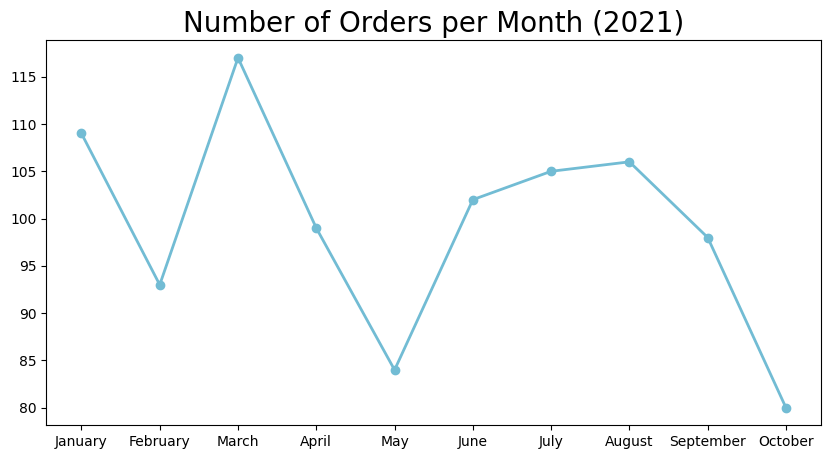

In [ ]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan Maret. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Februari, April, Mei, dan Oktober.

Tentunya penurunan tersebut akan berdampak pada total revenue yang diperoleh perusahaan. Untuk memvalidasi hal ini, buatlah line chart menggunakan contoh kode berikut.

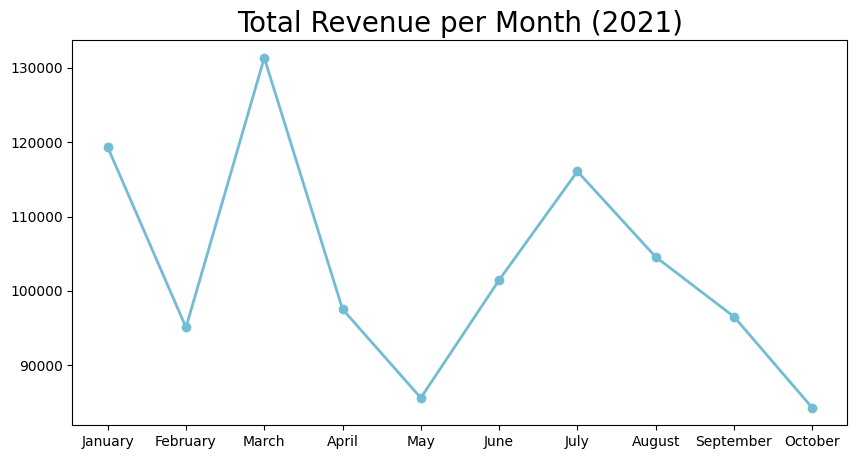

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?
Pada pertanyaan bisnis selanjutnya, kita ingin mengidentifikasi produk dengan penjualan terbanyak dan paling sedikit. Untuk melakukan ini, tentunya kita harus membuat sebuah DataFrame baru guna menampung informasi terkait jumlah penjualan tiap produk. Berikut merupakan contoh kode untuk melakukannya.

In [ ]:
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


Untuk mempermudah kita dalam menyampaikan informasi tersebut, kita harus membuat visualisasi data dalam bentuk bar chart. Selain itu, untuk mempermudah orang lain dalam mengidentifikasi produk dengan performa terbaik dan terburuk, kita perlu membuat dua buah visualisasi data dalam satu gambar visual. Untuk melakukan ini, gunakanlah function subplot(). Berikut contoh kode untuk membuatnya.

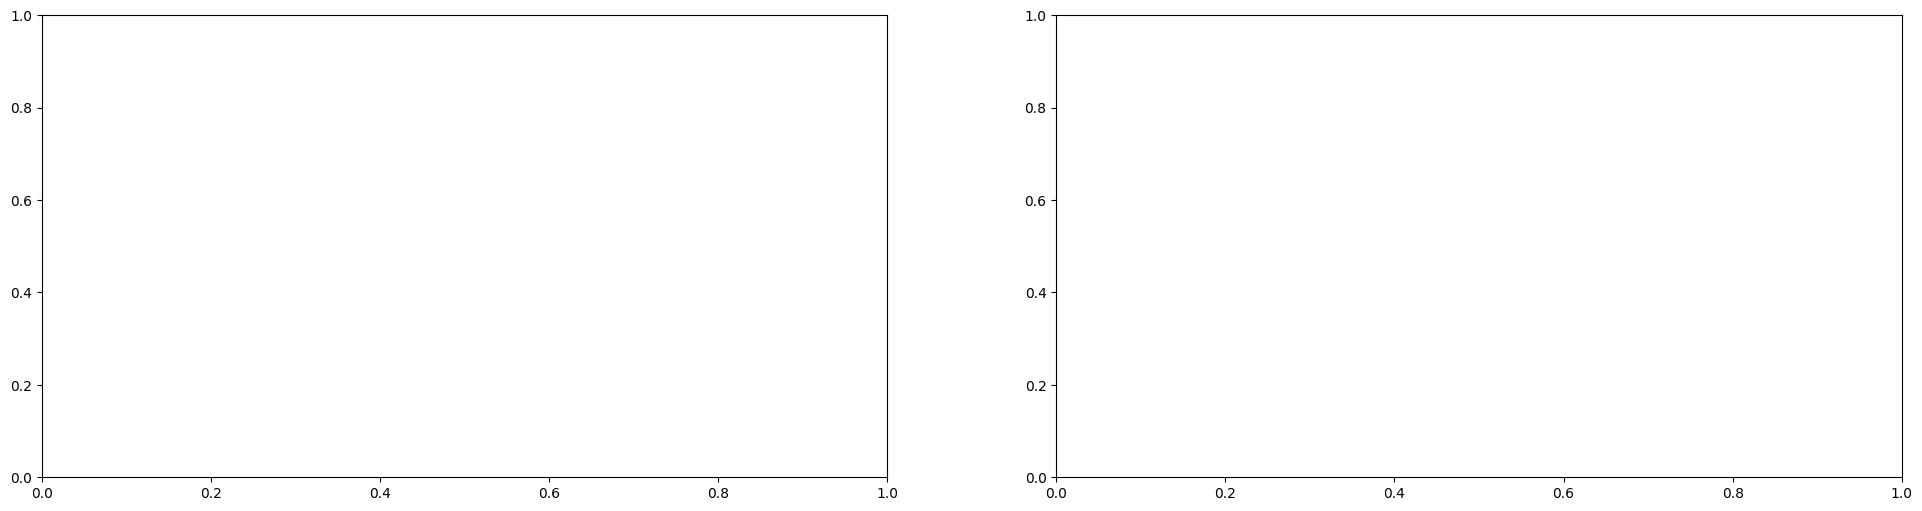

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

Selanjutnya, tentunya kita harus mengisi kanvas kosong tersebut dengan bar chart. Berikut contoh kode untuk melakukannya.

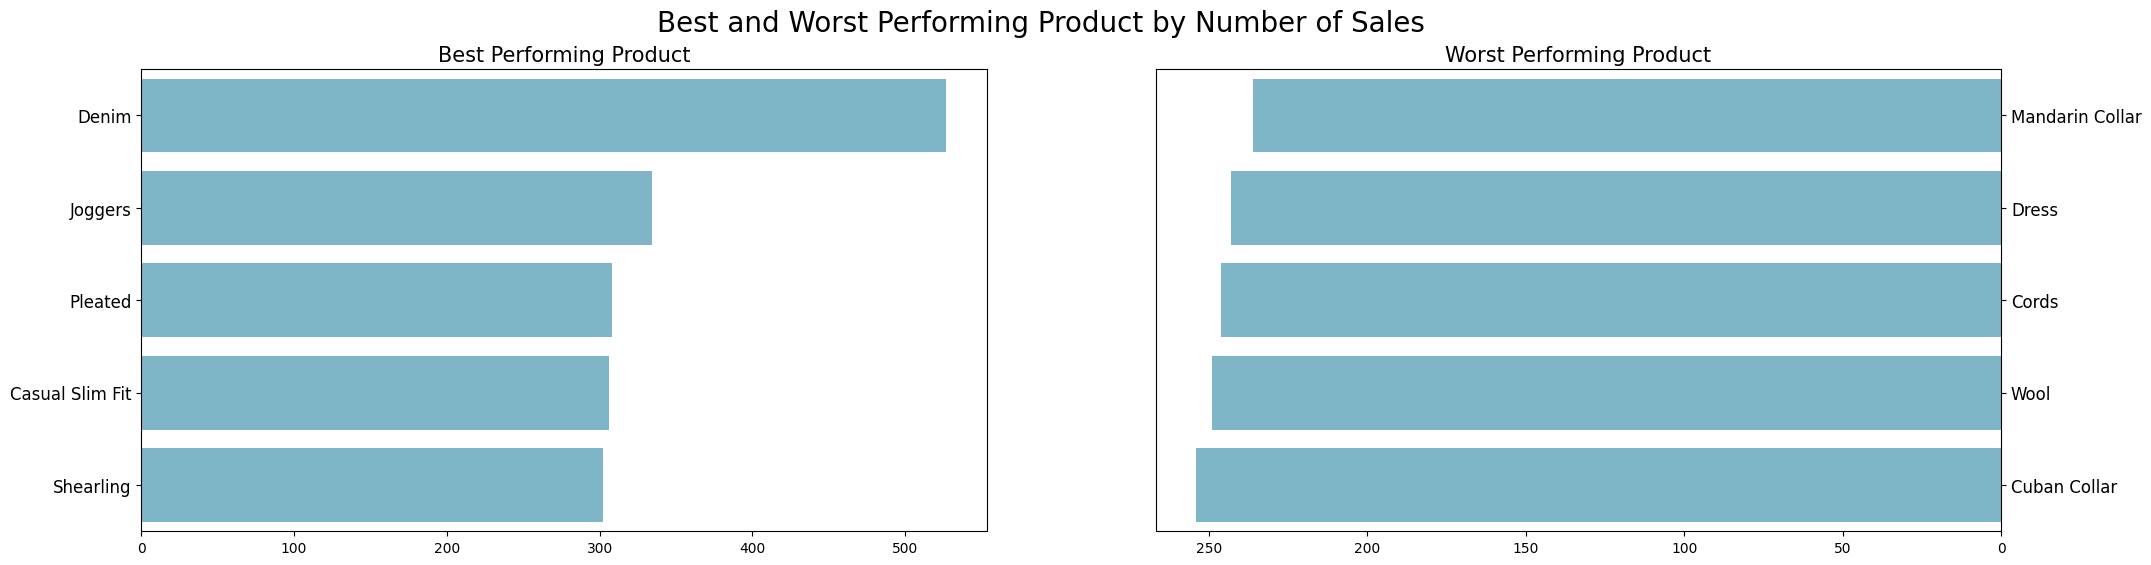

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Menghilangkan FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Kode lainnya tetap sama
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Best Performing Product
sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# Worst Performing Product
sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()


#### Bagaimana Demografi Pelanggan yang Kita Miliki?
Pertanyaan selanjutnya yang ingin kita jawab ialah terkait demografi pelanggan yang kita miliki. Untuk menjawab hal ini, tentunya kita bisa membuat DataFrame baru untuk menampung informasi terkait jumlah pelanggan untuk demografi tertentu seperti gender, state, dll.

##### Berdasarkan gender
Untuk mengidentifikasi jumlah pelanggan berdasarkan gender, Anda bisa menggunakan kode berikut.

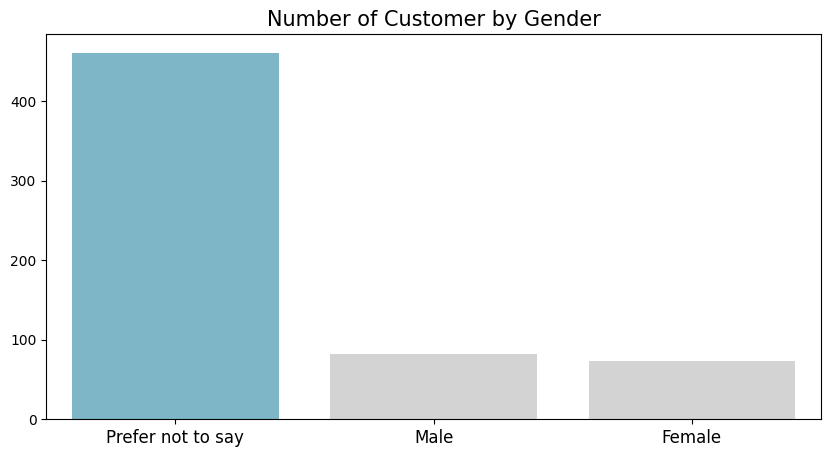

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data contoh
bygender_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

# Menyesuaikan jumlah warna sesuai dengan jumlah kategori gender
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="gender",
    data=bygender_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()


##### Berdasarkan age
Untuk melihat demografi pelanggan berdasarkan usia, kita bisa mengelompokkannya sesuai kelompok usia. Selanjutnya, kita bisa memvisualisasikan hasil pengelompokkan tersebut. Anda dapat menggunakan kode di bawah ini untuk melakukannya.

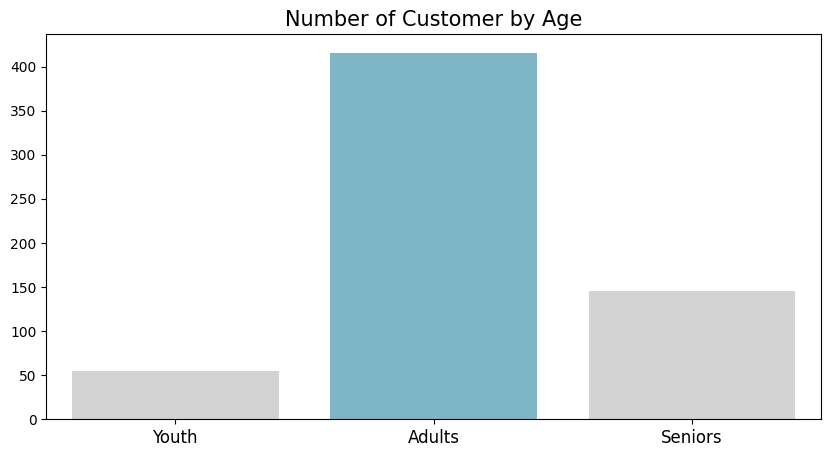

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data contoh
byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={"customer_id": "customer_count"}, inplace=True)
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Seniors"])

plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()


##### Berdasarkan states
Selain berdasarkan gender dan age, kita juga bisa melihat demografi pelanggan berdasarkan states atau negara bagiannya. Berikut contoh kode untuk melakukannya.

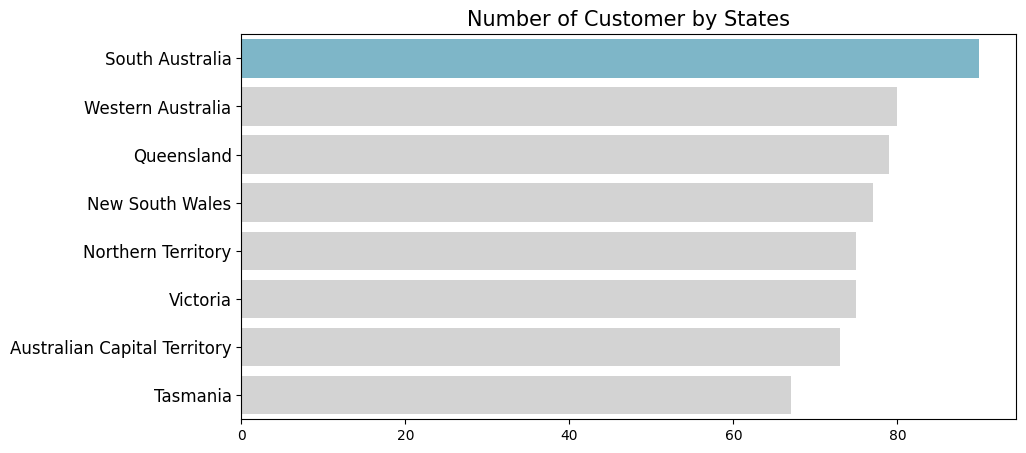

In [ ]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#### RFM Analysis
Untuk menjawab tiga pertanyaan analisis terakhir, kita bisa menggunakan teknik analisis lanjutan yang bernama RFM analysis. Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.
- Nah, berdasarkan tiga parameter tersebut, kita bisa mengidentifikasi pelanggan mana yang memiliki high value (sering melakukan transaksi dan menghasilkan revenue yang besar) dan low value.

Untuk melakukan RFM analysis, kita perlu membuat sebuah DataFrame untuk menampung informasi terkait tiga parameter tersebut. Berikut contoh kode yang dapat Anda gunakan untuk memperoleh informasi terkait recency, frequency, dan monetary.

In [ ]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


Nah, pada tahap ini Anda dapat mengidentifikasi best customer berdasarkan parameter frequency, monetary, dan recancy menggunakan kode berikut.

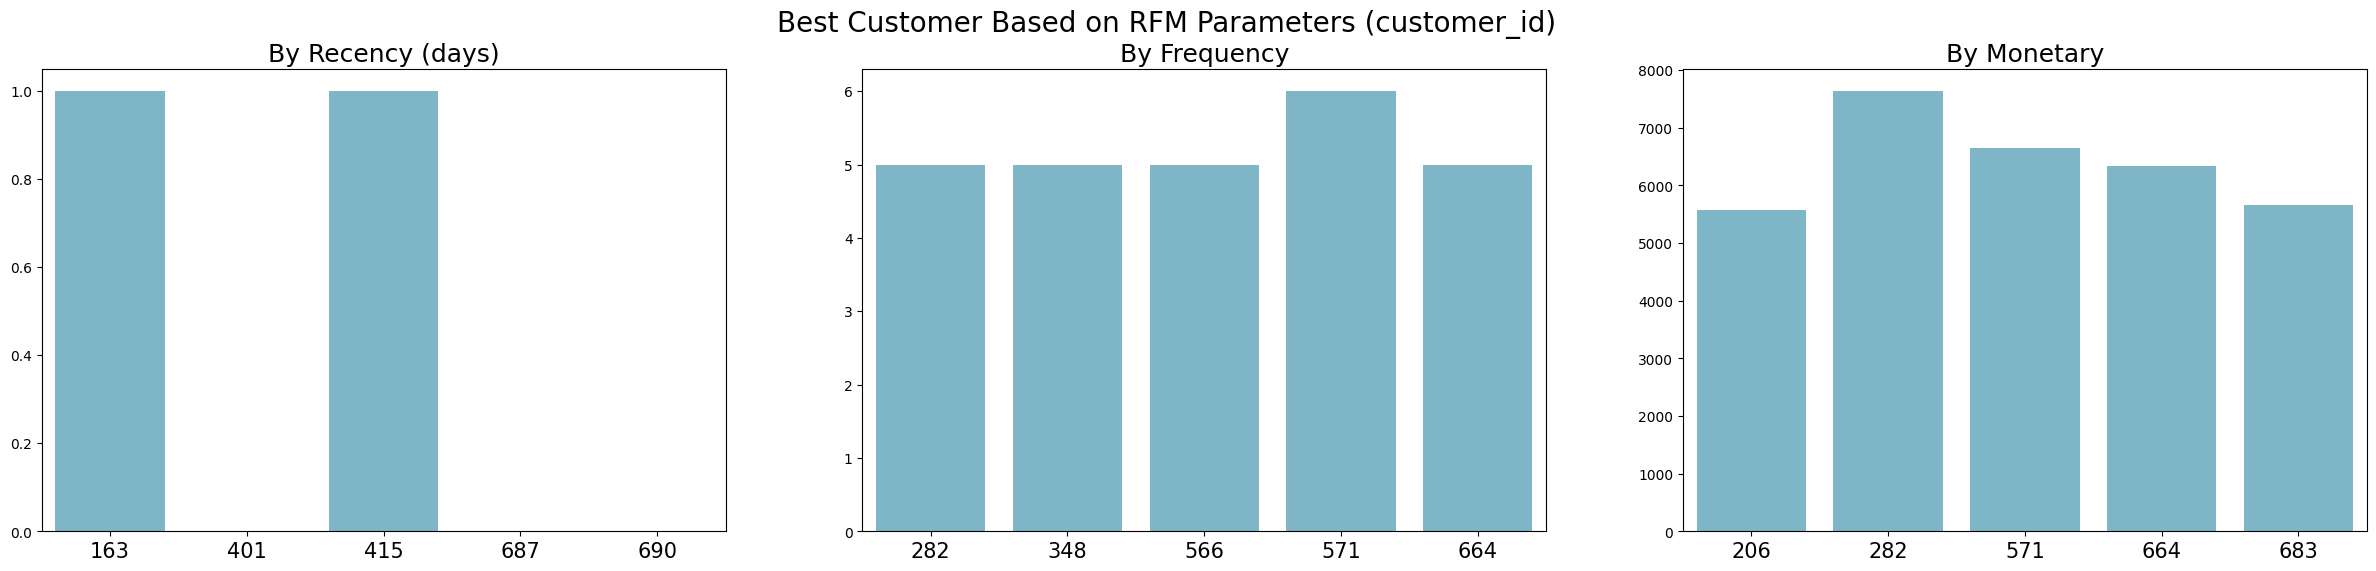

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

Dari visualisasi data di atas, kita dapat melihat beberapa pelanggan terbaik berdasarkan ketiga parameter tersebut.

## Latihan Membuat Dashboard Sederhana dengan Streamlit

In [ ]:
all_df.to_csv("all_data.csv", index=False)